In [1]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/OG/Desktop/Study/jupyter/env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


1.8.0


# Chapter 2

In [2]:
h=tf.constant(3.0, dtype=tf.float64)
w=tf.constant(4.12345678901234567890, dtype=tf.float64)
print(h)
# hw=h+w
h=tf.add(h,w)
# h=h+w

Tensor("Const:0", shape=(), dtype=float64)


In [3]:
with tf.Session() as sess:
    result=sess.run(h)
    print(result)
    print(type(result))

7.123456789012345
<class 'numpy.float64'>


In [4]:
from tensorflow.examples.tutorials.mnist import input_data

In [8]:
DATA_DIR='./data'
NUM_STEPS=900
MINIBATCH_SIZE=128

In [9]:
data = input_data.read_data_sets(DATA_DIR, one_hot=True)

x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))

y_true = tf.placeholder(tf.float32, [None, 10])
y_pred = tf.matmul(x, W)

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=y_pred, labels=y_true))

gd_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

correct_mask = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))
accuracy = tf.reduce_mean(tf.cast(correct_mask, tf.float32))

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz


In [10]:
with tf.Session() as sess:

    # Train
    sess.run(tf.global_variables_initializer())
    for _ in range(NUM_STEPS):
        batch_xs, batch_ys = data.train.next_batch(MINIBATCH_SIZE)
        sess.run(gd_step, feed_dict={x: batch_xs, y_true: batch_ys})

    # Test
    ans = sess.run(accuracy, feed_dict={x: data.test.images, y_true: data.test.labels})

print("Accuracy: {:.4}%".format(ans*100))

Accuracy: 91.9%


# Chapter 3

In [12]:
import matplotlib.pyplot as plt 
% matplotlib inline

In [15]:
sess = tf.InteractiveSession()

# === Noramal and Truncated normal distributions ===
mean = 0
std = 1
x_normal = tf.random_normal((1,50000),mean,std).eval()
print(x_normal)

# values whose magnitude is more than 2 standard deviations from the mean are dropped and re-picked
x_truncated = tf.truncated_normal((1,50000),mean,std).eval()

minval = -2 
maxval = 2
x_uniform = tf.random_uniform((1,50000),minval,maxval).eval()

sess.close()

[[-0.7882348  1.3626708 -0.3187108 ...  1.3301617 -1.2437432 -0.5202891]]


(1, 50000)


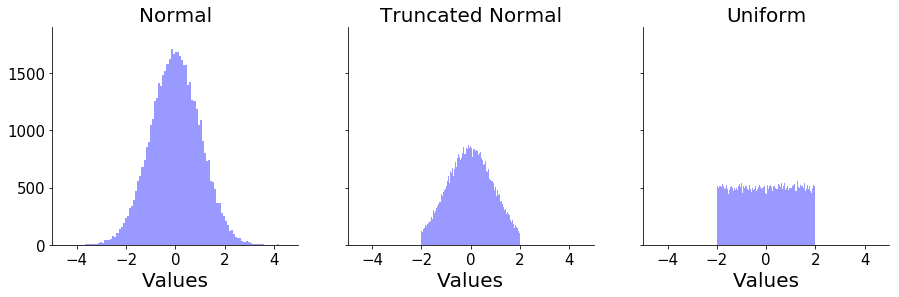

In [16]:
def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
#     ax.get_yaxis().tick_right()
    ax.get_yaxis().tick_left()
#     ax.set_ylim([-1.1,1.1])
    ax.tick_params(axis='both', which='major', labelsize=15)
    
def get_axis_limits(ax, scale=.8):
    return ax.get_xlim()[1]*scale, ax.get_ylim()[1]*scale

f,axarr = plt.subplots(1,3,figsize=[15,4],sharey=True)
titles = ['Normal','Truncated Normal','Uniform']

print(x_normal.shape)
for i,x in enumerate([x_normal,x_truncated,x_uniform]):
    ax = axarr[i]
    ax.hist(x[0],bins=100,color='b',alpha=0.4)
    ax.set_title(titles[i],fontsize=20)
    ax.set_xlabel('Values',fontsize=20)
    ax.set_xlim([-5,5])
    ax.set_ylim([0,1900])
    
    simpleaxis(ax)

In [18]:
sess = tf.InteractiveSession()
c = tf.linspace(0.0, 4.0, 10) 
print("The content of 'c':\n {}\n".format(c.eval()))
sess.close()

The content of 'c':
 [0.         0.44444445 0.8888889  1.3333334  1.7777778  2.2222223
 2.6666667  3.1111112  3.5555556  4.        ]



In [22]:
a = tf.constant([ [1,2,3],
                  [4,5,6] ])
print(a.get_shape())

x = tf.constant([1,0,1])
print(x.get_shape())

x = tf.expand_dims(x,1)
print(x.get_shape())

b = tf.matmul(A,x)
c = tf.reduce_sum(b)

sess = tf.InteractiveSession()
print('matmul result:\n {}'.format(c.eval()))
sess.close()

(2, 3)
(3,)
(3, 1)
matmul result:
 14


In [23]:
with tf.Graph().as_default():
    c1 = tf.constant(4,dtype=tf.float64,name='c') 
    c2 = tf.constant(4,dtype=tf.int32,name='c') 
print(c1.name)
print(c2.name)

c:0
c_1:0


In [24]:
with tf.Graph().as_default():
    c1 = tf.constant(4,dtype=tf.float64,name='c') 
    with tf.name_scope("prefix_name"):
        c2 = tf.constant(4,dtype=tf.int32,name='c') 
        c3 = tf.constant(4,dtype=tf.float64,name='c')

print(c1.name)
print(c2.name)
print(c3.name)

c:0
prefix_name/c:0
prefix_name/c_1:0


In [25]:
init_val = tf.random_normal((1,5),0,1)
var = tf.Variable(init_val, name='var') 
print("pre run: \n{}".format(var))

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    post_var = sess.run(var)

print("\npost run: \n{}".format(post_var))

pre run: 
<tf.Variable 'var:0' shape=(1, 5) dtype=float32_ref>

post run: 
[[ 1.1348169  -1.5934124   0.68238336  0.85299075 -0.04225707]]


In [26]:
init_val = tf.random_normal((1,5),0,1)
# var = tf.Variable(init_val, name='var') 
with tf.variable_scope("var_reuse", reuse=tf.AUTO_REUSE):
    var = tf.get_variable(shape=(1,5),name='var')
print("pre run: \n{}".format(var))

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    post_var = sess.run(var)

print("\npost run: \n{}".format(post_var))

pre run: 
<tf.Variable 'var_reuse/var:0' shape=(1, 5) dtype=float32_ref>

post run: 
[[ 0.5153897  -0.65541816  0.04273534  0.7610805   0.8184285 ]]


In [27]:
# === Create data and simulate results =====
x_data = np.random.randn(2000,3)
w_real = [0.3,0.5,0.1]
b_real = -0.2

noise = np.random.randn(1,2000)*0.1
y_data = np.matmul(w_real,x_data.T) + b_real + noise

In [28]:
NUM_STEPS = 10

g = tf.Graph()
wb_ = []
with g.as_default():
    x = tf.placeholder(tf.float32,shape=[None,3])
    y_true = tf.placeholder(tf.float32,shape=None)
    
    with tf.name_scope('inference') as scope:
        w = tf.Variable([[0,0,0]],dtype=tf.float32,name='weights')
        b = tf.Variable(0,dtype=tf.float32,name='bias')
        y_pred = tf.matmul(w,tf.transpose(x)) + b

    with tf.name_scope('loss') as scope:
        loss = tf.reduce_mean(tf.square(y_true-y_pred))
  
    with tf.name_scope('train') as scope:
        learning_rate = 0.5
        optimizer = tf.train.GradientDescentOptimizer(learning_rate)
        train = optimizer.minimize(loss)

    # Before starting, initialize the variables.  We will 'run' this first.
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)      
        for step in range(NUM_STEPS):
            sess.run(train,{x: x_data, y_true: y_data})
            if (step % 5 == 0):
                print(step, sess.run([w,b])) 
                wb_.append(sess.run([w,b]))
                
        print(10, sess.run([w,b]))

0 [array([[0.31062472, 0.47171816, 0.08764149]], dtype=float32), -0.18602885]
5 [array([[0.2995118 , 0.50120735, 0.10331269]], dtype=float32), -0.19906588]
10 [array([[0.2995118 , 0.5012074 , 0.10331272]], dtype=float32), -0.19906591]


In [29]:
print(wb_)

[[array([[0.31062472, 0.47171816, 0.08764149]], dtype=float32), -0.18602885], [array([[0.2995118 , 0.50120735, 0.10331269]], dtype=float32), -0.19906588]]


In [30]:
N = 20000

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# === Create data and simulate results =====
x_data = np.random.randn(N,3)
w_real = [0.3,0.5,0.1]
b_real = -0.2
wxb = np.matmul(w_real,x_data.T) + b_real

y_data_pre_noise = sigmoid(wxb)
y_data = np.random.binomial(1,y_data_pre_noise)

In [32]:
NUM_STEPS = 50


g = tf.Graph()
wb_ = []
with g.as_default():
    x = tf.placeholder(tf.float32,shape=[None,3])
    y_true = tf.placeholder(tf.float32,shape=None)
    
    with tf.name_scope('inference') as scope:
        w = tf.Variable([[0,0,0]],dtype=tf.float32,name='weights')
        b = tf.Variable(0,dtype=tf.float32,name='bias')
        y_pred = tf.matmul(w,tf.transpose(x)) + b

    with tf.name_scope('loss') as scope:
        loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true,logits=y_pred) 
        loss = tf.reduce_mean(loss)
  
    with tf.name_scope('train') as scope:
        learning_rate = 0.5
        optimizer = tf.train.GradientDescentOptimizer(learning_rate)
        train = optimizer.minimize(loss)



    # Before starting, initialize the variables.  We will 'run' this first.
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)      
        for step in range(NUM_STEPS):
            sess.run(train,{x: x_data, y_true: y_data})
            if (step % 5 == 0):
                print(step, sess.run([w,b]))
                wb_.append(sess.run([w,b]))

        print(50, sess.run([w,b]))

0 [array([[0.03753735, 0.0616853 , 0.01101867]], dtype=float32), -0.02132497]
5 [array([[0.1662885 , 0.27338967, 0.04914296]], dtype=float32), -0.094358526]
10 [array([[0.23547898, 0.38734972, 0.06992247]], dtype=float32), -0.13346045]
15 [array([[0.27450055, 0.45176435, 0.08177455]], dtype=float32), -0.15540823]
20 [array([[0.29722032, 0.4893591 , 0.08873753]], dtype=float32), -0.16812219]
25 [array([[0.31070557, 0.511726  , 0.09290066]], dtype=float32), -0.17563096]
30 [array([[0.3188027 , 0.525186  , 0.09541558]], dtype=float32), -0.18011843]
35 [array([[0.32369873, 0.53334135, 0.09694406]], dtype=float32), -0.18282011]
40 [array([[0.32667178, 0.53830296, 0.09787632]], dtype=float32), -0.18445428]
45 [array([[0.32848188, 0.54132897, 0.09844608]], dtype=float32), -0.18544573]
50 [array([[0.32940632, 0.54287654, 0.09873793]], dtype=float32), -0.18595059]
